In [95]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

# Read dataset csv
employment_df = pd.read_csv("bptms_Employed_persons_by_industry_state.csv")

# *User-Defined year value to filter the dataset*
# Between 1982 and 2016
year = 2016

# Only retain data recorded in User-Defined year value
employment_df = employment_df[employment_df['Year'] == year]

# Get all states in the dataset
state_lst = employment_df['State/Country'].unique().tolist()

# Set State to be the index of the dataframe
employment_df.set_index("State/Country", inplace=True)

In [96]:
# Show 5 rows of the dataframe
print(employment_df.shape)
employment_df.head()

(357, 4)


,Year,Category of industry,Code version,Employed Person ('000)
State/Country,,,,
Malaysia,2016,Total,MSIC 2008,"14,163.7"
Johor,2016,Total,MSIC 2008,"1,580.6"
Kedah,2016,Total,MSIC 2008,884.3
Kelantan,2016,Total,MSIC 2008,632.9
Melaka,2016,Total,MSIC 2008,397.3


In [97]:
# Extract all the industries there are in the dataframe
industry_lst = employment_df['Category of industry'].unique().tolist()
print(industry_lst)

['Total', 'Agriculture, forestry and fishing', 'Mining and quarrying', 'Manufacturing', 'Electricity, gas, steam and air conditioning supply', 'Water supply; sewerage, waste management and remediation activities', 'Construction', 'Wholesale and retail trade, repair of motor vehicles and motorcycles', 'Transportation and storage', 'Accommodation and food service activities', 'Information and communication', 'Financial and insurance/takaful activities', 'Real estate activities', 'Professional, scientific and technical activities', 'Administrative and support service activities', 'Public administration and defence; compulsory social security', 'Education', 'Human health and social work activities', 'Arts, entertainment and recreation', 'Others service activities', 'Activities of households as employers']


In [98]:
# Show all the states extracted
print(len(state_lst))
print(state_lst)

17
['Malaysia', 'Johor', 'Kedah', 'Kelantan', 'Melaka', 'Negeri Sembilan', 'Pahang', 'Pulau Pinang', 'Perak', 'Perlis', 'Selangor', 'Terengganu', 'Sabah', 'Sarawak', 'W.P. Kuala Lumpur', 'W.P Labuan', 'W.P.Putrajaya']


In [99]:
# Initialize a new dictionary
new_dict = {}

# Modify the 'Employed Persons' values (number of employees) from str to float,
# and insert them into the dictionary accordingly
for industry in industry_lst:
    number_employ = {}
    current_industry_df = employment_df[employment_df['Category of industry'] == industry]
    for state in state_lst:
        value = str(current_industry_df.loc[state]['Employed Person (\'000)'])
        number_employ[state] = float(value.replace(',',''))
    new_dict[industry] = number_employ

# Show the dictionary    
print(len(new_dict))
print(new_dict.get('Agriculture, forestry and fishing'))

21
{'Malaysia': 1609.9, 'Johor': 101.7, 'Kedah': 114.0, 'Kelantan': 79.5, 'Melaka': 18.2, 'Negeri Sembilan': 42.2, 'Pahang': 151.8, 'Pulau Pinang': 10.5, 'Perak': 111.1, 'Perlis': 12.3, 'Selangor': 41.8, 'Terengganu': 42.0, 'Sabah': 581.6, 'Sarawak': 301.1, 'W.P. Kuala Lumpur': 0.4, 'W.P Labuan': 1.8, 'W.P.Putrajaya': nan}


In [100]:
# Create a new dataframe to store all the processed data
processed_employ_df = pd.DataFrame()

# Create a new column 'State/Country'
processed_employ_df['State/Country'] = state_lst

# Set the states to be the index of the dataframe
processed_employ_df.set_index("State/Country", inplace=True)

# Initialize all the columns and all the values to 0
for industry in industry_lst:
    processed_employ_df[industry] = 0

# Set the value accordingly based on state and industry
for state in state_lst:
    for industry in industry_lst:
        value = new_dict.get(industry).get(state)
        processed_employ_df.loc[state, industry] = value

# Show the newly prepared dataframe
processed_employ_df

,Total,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,"Wholesale and retail trade, repair of motor vehicles and motorcycles",Transportation and storage,Accommodation and food service activities,...,Financial and insurance/takaful activities,Real estate activities,"Professional, scientific and technical activities",Administrative and support service activities,Public administration and defence; compulsory social security,Education,Human health and social work activities,"Arts, entertainment and recreation",Others service activities,Activities of households as employers
State/Country,,,,,,,,,,,,,,,,,,,,,
Malaysia,14163.7,1609.9,96.3,2390.6,77.9,76.4,1251.7,2428.5,630.4,1260.7,...,346.9,82.4,361.8,657.0,748.2,928.7,570.3,80.9,230.8,124.7
Johor,1580.6,101.7,7.8,429.5,3.8,13.0,126.5,272.9,87.2,128.8,...,27.2,8.9,31.0,81.8,62.1,90.4,57.0,8.4,25.7,10.8
Kedah,884.3,114.0,1.9,173.9,3.9,9.8,61.8,150.5,28.0,96.8,...,10.7,2.8,7.4,40.8,43.8,69.6,48.6,4.7,9.5,2.9
Kelantan,632.9,79.5,2.1,64.4,3.1,0.9,84.1,133.4,17.1,65.5,...,7.9,0.7,5.9,23.8,37.7,62.8,31.3,1.9,7.3,1.3
Melaka,397.3,18.2,2.9,93.8,1.9,3.2,27.6,65.4,9.7,44.4,...,7.9,0.9,7.9,21.7,24.3,31.2,22.4,1.9,5.2,3.5
Negeri Sembilan,466.9,42.2,2.1,70.2,3.1,3.7,38.2,75.2,30.1,48.5,...,11.2,3.6,7.2,22.4,36.3,32.5,23.8,3.2,6.5,4.3
Pahang,692.2,151.8,3.9,66.5,2.9,6.3,48.2,112.7,25.1,70.8,...,9.2,1.4,6.6,34.5,41.4,60.6,33.7,3.5,8.4,2.3
Pulau Pinang,827.4,10.5,0.1,272.5,5.3,3.3,61.3,127.6,42.6,79.2,...,19.6,7.0,19.6,32.8,29.1,47.2,33.6,5.5,14.2,8.4
Perak,988.2,111.1,10.1,162.1,7.8,3.5,82.0,187.1,32.8,104.1,...,14.7,1.1,13.8,40.5,61.9,80.8,38.1,5.3,18.6,8.9


In [101]:
# Show the number of employed persons in all industry in the state Sarawak
processed_employ_df.loc['Sarawak'].values.tolist()[1:-1]


[301.1,
 12.4,
 134.0,
 7.2,
 5.1,
 132.2,
 174.7,
 46.1,
 83.9,
 7.7,
 13.5,
 1.8,
 16.5,
 48.5,
 80.1,
 88.6,
 35.7,
 4.9,
 15.3]

In [102]:
# Drop any row that contains a NaN value
preprocessed_employ_df = processed_employ_df.dropna()
preprocessed_employ_df

,Total,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,"Wholesale and retail trade, repair of motor vehicles and motorcycles",Transportation and storage,Accommodation and food service activities,...,Financial and insurance/takaful activities,Real estate activities,"Professional, scientific and technical activities",Administrative and support service activities,Public administration and defence; compulsory social security,Education,Human health and social work activities,"Arts, entertainment and recreation",Others service activities,Activities of households as employers
State/Country,,,,,,,,,,,,,,,,,,,,,
Malaysia,14163.7,1609.9,96.3,2390.6,77.9,76.4,1251.7,2428.5,630.4,1260.7,...,346.9,82.4,361.8,657.0,748.2,928.7,570.3,80.9,230.8,124.7
Johor,1580.6,101.7,7.8,429.5,3.8,13.0,126.5,272.9,87.2,128.8,...,27.2,8.9,31.0,81.8,62.1,90.4,57.0,8.4,25.7,10.8
Kedah,884.3,114.0,1.9,173.9,3.9,9.8,61.8,150.5,28.0,96.8,...,10.7,2.8,7.4,40.8,43.8,69.6,48.6,4.7,9.5,2.9
Kelantan,632.9,79.5,2.1,64.4,3.1,0.9,84.1,133.4,17.1,65.5,...,7.9,0.7,5.9,23.8,37.7,62.8,31.3,1.9,7.3,1.3
Melaka,397.3,18.2,2.9,93.8,1.9,3.2,27.6,65.4,9.7,44.4,...,7.9,0.9,7.9,21.7,24.3,31.2,22.4,1.9,5.2,3.5
Negeri Sembilan,466.9,42.2,2.1,70.2,3.1,3.7,38.2,75.2,30.1,48.5,...,11.2,3.6,7.2,22.4,36.3,32.5,23.8,3.2,6.5,4.3
Pahang,692.2,151.8,3.9,66.5,2.9,6.3,48.2,112.7,25.1,70.8,...,9.2,1.4,6.6,34.5,41.4,60.6,33.7,3.5,8.4,2.3
Pulau Pinang,827.4,10.5,0.1,272.5,5.3,3.3,61.3,127.6,42.6,79.2,...,19.6,7.0,19.6,32.8,29.1,47.2,33.6,5.5,14.2,8.4
Perak,988.2,111.1,10.1,162.1,7.8,3.5,82.0,187.1,32.8,104.1,...,14.7,1.1,13.8,40.5,61.9,80.8,38.1,5.3,18.6,8.9


Text(0.5,1,'Category of Industry vs The number of Employment')

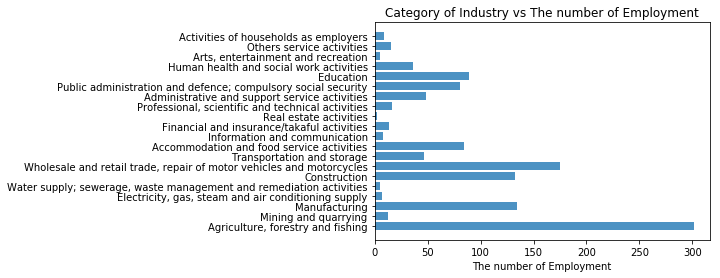

In [103]:
# Demo by plotting a bar chart
# Ignore the 'Total' column
num_employ = preprocessed_employ_df.loc['Sarawak'].values.tolist()[1:]

plt.clf()

# Ignore 'Total' column
objects = industry_lst[1:]

y_pos = np.arange(len(objects))
performance = num_employ

plt.barh(y_pos, performance, align='center', alpha=0.8)
plt.yticks(y_pos, objects)
plt.xlabel('The number of Employment')
plt.title('Category of Industry vs The number of Employment')